In [8]:
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable,Chain,config

In [29]:
import numpy as np
import matplotlib.pyplot as plt
D=100
N=2
xdata=np.random.randn(N*D).reshape(D,N).astype(np.float32)
def f(x):
    y=x*x
    return y
tdata=(xdata[:,1]>f(xdata[:,0])).astype(np.int32)
tdata

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [30]:
C=2
NN=Chain(l1=L.Linear(N,C))

In [31]:
def model(x):
    y=NN.l1(x)
    return y

In [32]:
ydata=model(xdata)

In [33]:
acc=F.accuracy(ydata,tdata)
print(acc)

variable(0.7)


In [34]:
optNN=Opt.SGD()
optNN.setup(NN)

In [35]:
loss_series=[]
acc_series=[]

In [36]:
T=5000
for time in range(T):
    config.train=True
    optNN.target.zerograds()
    ydata = model(xdata)
    loss = F.softmax_cross_entropy(ydata,tdata)
    acc = F.accuracy(ydata,tdata)
    loss.backward()
    optNN.update()
    loss_series.append(loss.data)
    acc_series.append(acc.data)

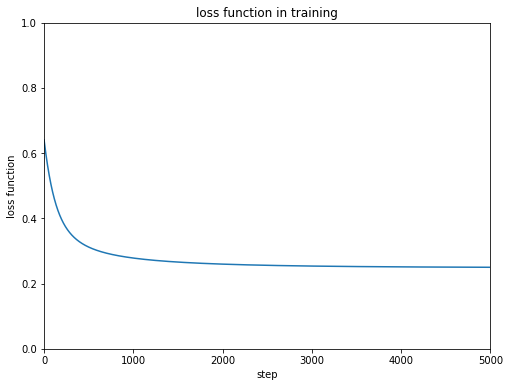

In [37]:
import matplotlib.pyplot as plt

Tall = len(loss_series)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),loss_series)
plt.title('loss function in training')
plt.xlabel('step')
plt.ylabel('loss function')
plt.xlim([0,Tall])
plt.ylim([0,1])
plt.show()

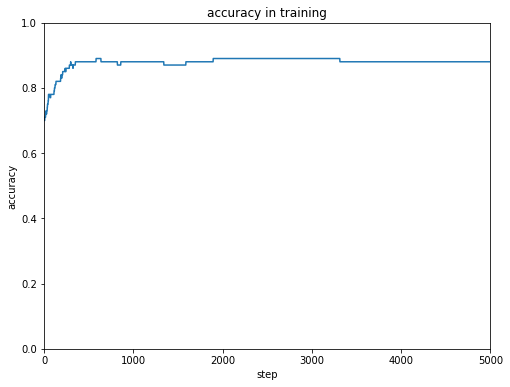

In [38]:
Tall = len(acc_series)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),acc_series)
plt.title("accuracy in training")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0,Tall])
plt.ylim([0,1])
plt.show()

In [39]:
C=2
NN=Chain(l1=L.Linear(N,4),l2=L.Linear(4,C))
def model2(x):
    h=NN.l1(x)
    h=F.sigmoid(h)
    y=NN.l2(h)
    return y

optNN=Opt.SGD()
optNN.setup(NN)

loss_series=[]
acc_series=[]

T=20000
for time in range(T):
    config.train=True
    optNN.target.zerograds()
    ydata=model2(xdata)
    loss=F.softmax_cross_entropy(ydata,tdata)
    acc=F.accuracy(ydata,tdata)
    loss.backward()
    optNN.update()
    
    loss_series.append(loss.data)
    acc_series.append(acc.data)

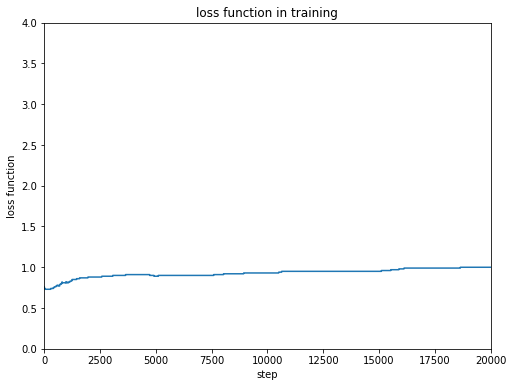

In [40]:
Tall = len(loss_series)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),acc_series)
plt.title("loss function in training")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0,Tall])
plt.ylim([0,4])
plt.show()

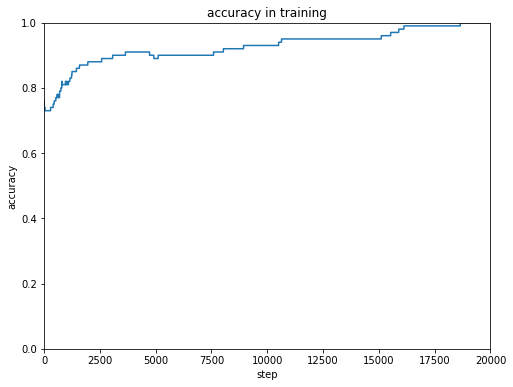

In [41]:
Tall = len(acc_series)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),acc_series)
plt.title("accuracy in training")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0,Tall])
plt.ylim([0,1])
plt.show()